In [378]:
import numpy as np
import matplotlib.pyplot as plt

In [379]:
# Линеная регрессия
import numpy as np
import matplotlib.pyplot as pp
x=np.random.rand(100,1)
print(x.shape)
y=5.1*x[:,0]+3+np.random.rand(100)*0.5 
# y[10]=10000

(100, 1)


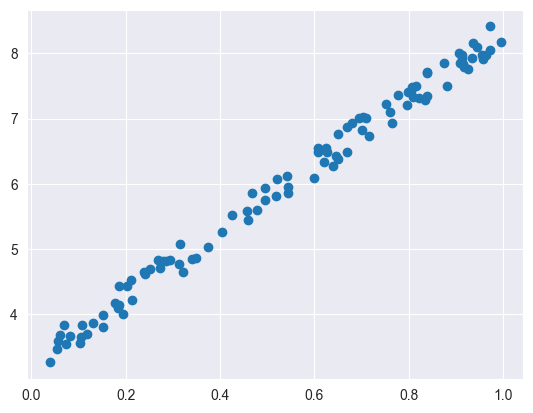

In [380]:
plt.scatter(x, y)
plt.show()

In [381]:
x_n = x[:, 0]
c1 = np.sum(x_n ** 2)
c2 = np.sum(x_n)
c3 = np.sum(x_n)
c4 = len(x_n)
D = c1 * c4 - c2 * c3
A = (np.sum(x_n * y) * c4 - np.sum(y) * c2) / D
B = (c1 * np.sum(y) - np.sum(x_n * y) * c2) / D

A, B

(np.float64(5.073974290366713), np.float64(3.2616806125260274))

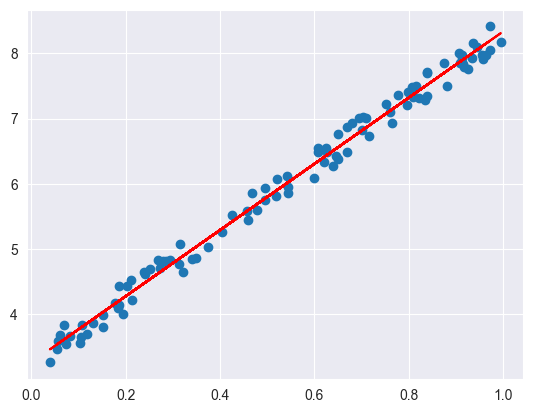

In [382]:
y_pr = A * x + B
plt.scatter(x_n, y)
plt.plot(x_n, y_pr, color = 'red')
plt.show()

mse: 0.9903193050485193


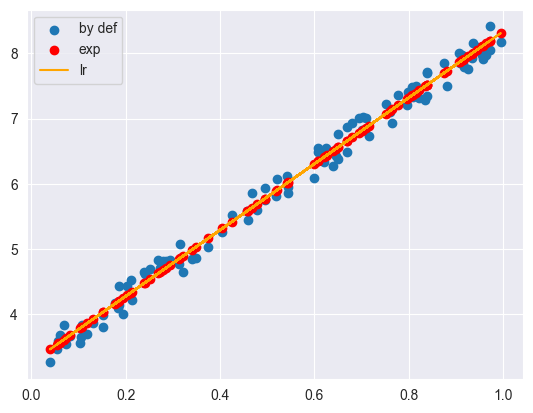

In [383]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x, y)
print(f'mse: {clf.score(x, y)}')
ym = clf.predict(x)
plt.scatter(x, y, label = 'by def')
plt.scatter(x_n, ym, color = 'red', label = 'exp')
plt.plot(x_n, y_pr, color = 'orange', label = 'lr')
plt.legend()
plt.show()

In [384]:
print('Coefs LR: ', clf.coef_, clf.intercept_)
print('Coef by Def', A, B)

Coefs LR:  [5.07397429] 3.261680612526038
Coef by Def 5.073974290366713 3.2616806125260274


In [385]:
x=np.random.rand(100,3)
print(x.shape)
y=5.1*x[:,0]+7.1*x[:,1]+12.1*x[:,2]+3+np.random.rand(100)*0.5

(100, 3)


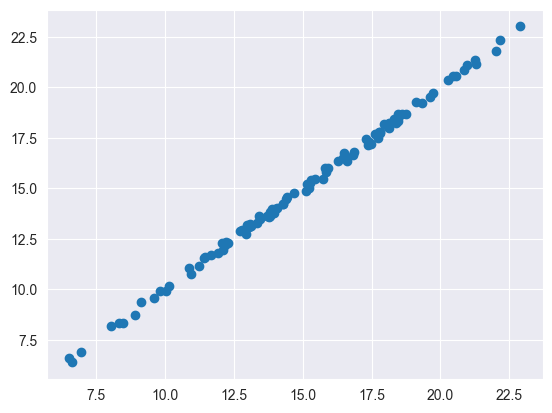

Coefs LR:  [ 5.08824141  7.04758582 12.04654424] 3.2887539589473462


In [386]:
clf = LinearRegression()
x = x.reshape(x.shape[0], -1)
clf.fit(x, y)
ym = clf.predict(x)
plt.scatter(y, ym)
plt.show()
print('Coefs LR: ', clf.coef_, clf.intercept_)

In [387]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data = load_diabetes()
print(data.data.shape, data.target.shape)

(442, 10) (442,)


score: 0.5313032950901413


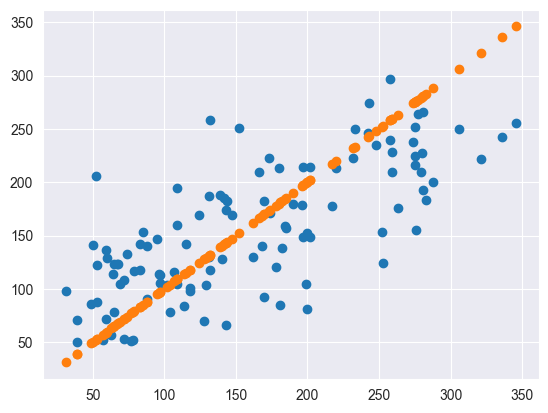

Coefs LR:  [ -34.99557501 -254.68424696  450.27808226  307.50340621 -184.79035916
   75.8652062  -216.88863097    6.78329576  636.59242934   73.59789129] 151.28764968704033


In [388]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

clf = LinearRegression()
clf.fit(x_train, y_train)
print("score:" ,clf.score(x_test, y_test))
ym = clf.predict(x_test)

plt.scatter(y_test, ym)
plt.scatter(y_test, y_test)
plt.show()
print('Coefs LR: ', clf.coef_, clf.intercept_)

In [389]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (10, )))
model.add(tf.keras.layers.Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [390]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e0), loss = 'mse', metrics = ['mse'])
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3)
hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 1000, callbacks = [es])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 28080.9004 - mse: 28080.9004 - val_loss: 21424.9824 - val_mse: 21424.9824
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25314.9043 - mse: 25314.9043 - val_loss: 19209.6113 - val_mse: 19209.6113
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22712.8184 - mse: 22712.8184 - val_loss: 17194.0898 - val_mse: 17194.0898
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20333.5527 - mse: 20333.5527 - val_loss: 15365.4473 - val_mse: 15365.4473
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18205.9512 - mse: 18205.9512 - val_loss: 13756.3379 - val_mse: 13756.3379
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16307.1973 - mse: 16307.1973 - val_loss: 12300.8291 - val_mse: 12300.8291
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14601.0000 - mse: 14601.0000 - val_loss: 11000.5029 - val_mse: 11000.5029
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13043.7881 - ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3208.4617 - mse: 3208.4617 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


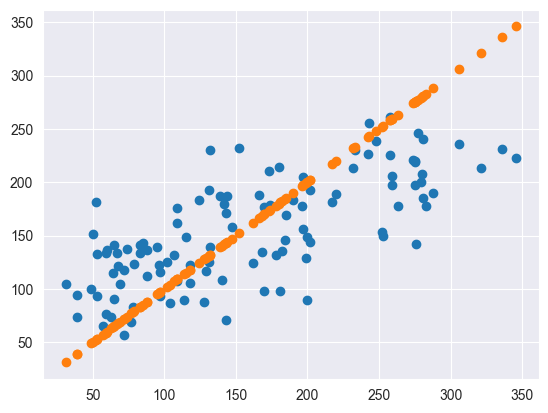

In [391]:
model.evaluate(x_test, y_test)
ym = model.predict(x_test)
plt.scatter(y_test, ym)
plt.scatter(y_test, y_test)
plt.show()


In [392]:
print('Coefs tf: ', model.weights)
print('Coefs LR', clf.coef_, clf.intercept_)

Coefs tf:  [<Variable path=sequential_11/dense_10/kernel, shape=(10, 1), dtype=float32, value=[[  60.035057]
 [-144.88074 ]
 [ 324.4951  ]
 [ 275.04425 ]
 [  12.739829]
 [ -86.12937 ]
 [-217.585   ]
 [ 132.88556 ]
 [ 327.80344 ]
 [ 150.97774 ]]>, <Variable path=sequential_11/dense_10/bias, shape=(1,), dtype=float32, value=[152.40308]>]
Coefs LR [ -34.99557501 -254.68424696  450.27808226  307.50340621 -184.79035916
   75.8652062  -216.88863097    6.78329576  636.59242934   73.59789129] 151.28764968704033


In [393]:
x = np.random.rand(100, 1)
y=5.1*x[:,0]+3+np.random.rand(100)*0.5 
y[10]=10000

0.015988479087919893
Coefs LR [-430.54991246] 347.1762415710605


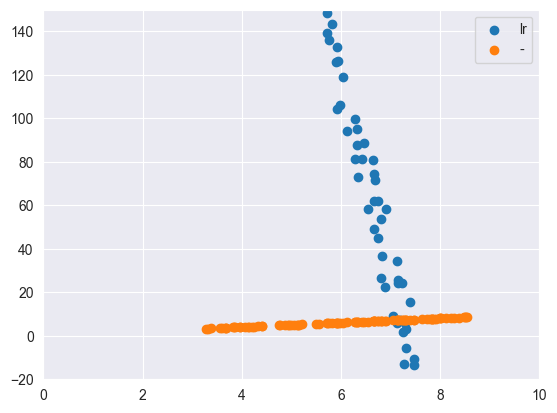

In [394]:
clf = LinearRegression()
x.reshape(x.shape[0], -1)
clf.fit(x, y)
ym = clf.predict(x)
print(clf.score(x, y))
print('Coefs LR', clf.coef_, clf.intercept_)

plt.scatter(y, ym, label = 'lr')
plt.scatter(y, y, label = '-')
plt.xlim(0, 10)
plt.ylim(-20, 150)
plt.legend()
plt.show()

-621.2787371913919 642.9567657026107


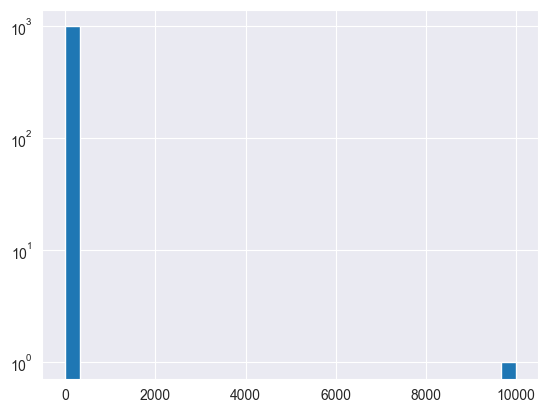

In [395]:
#Выбросы
import scipy.stats as ss
x=ss.norm(1,3).rvs(1000)
x[50]=1e4
# pp.plot(x)
pp.hist(x,bins=30)
pp.yscale('log')

p1, p2 = x.mean() - 2 * x.std(), x.mean() + 2 * x.std()
print(p1, p2)

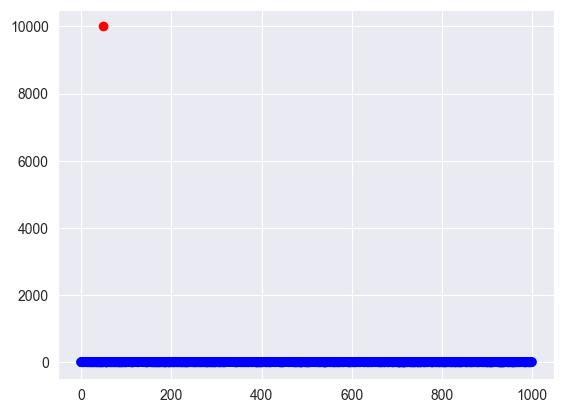

In [396]:
c = np.array(['blue']*x.shape[0])
c[x > p2] = 'red'
c[x < p1] = 'red'
plt.scatter(range(x.shape[0]), x, c = c)

-6.397005041634503 6.619145706363587


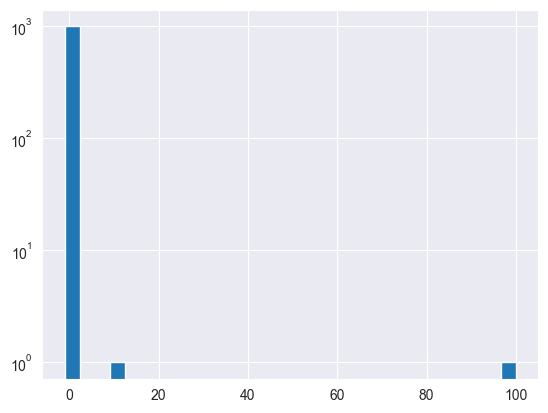

In [397]:
x=np.sin(np.array(range(1000))*0.1)
x[20]=1e1
x[35]=1e2
pp.hist(x,bins=30)
pp.yscale('log')

p1, p2 = x.mean() - 2 * x.std(), x.mean() + 2 * x.std()
print(p1, p2)


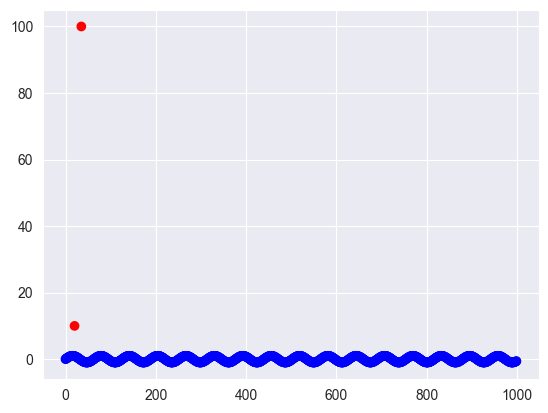

In [398]:
c = np.array(['blue']*x.shape[0])
c[x > p2] = 'red'
c[x < p1] = 'red'
plt.scatter(range(x.shape[0]), x, c = c)

In [399]:
import seaborn as sns
titanic_dataset = sns.load_dataset("titanic")
print(titanic_dataset.head())

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


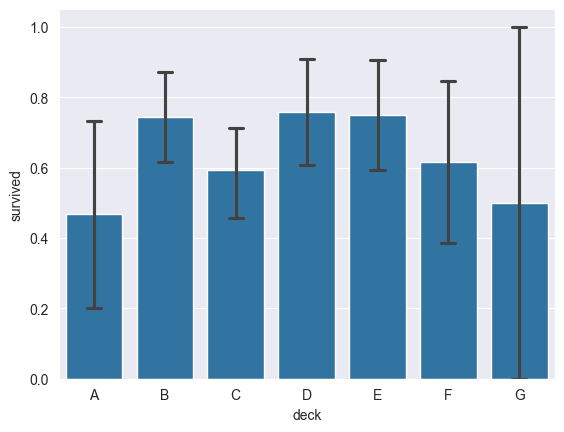

In [400]:
sns.barplot(x = 'deck', y = 'survived', data = titanic_dataset, capsize = .2)
plt.show()

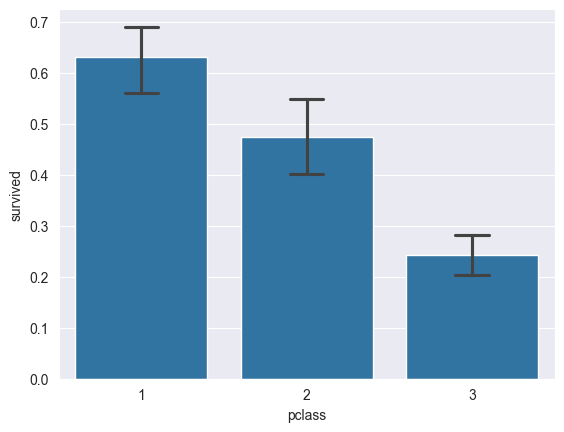

In [401]:
sns.barplot(x = 'pclass', y = 'survived', data = titanic_dataset, capsize = .2)
plt.show()

In [402]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


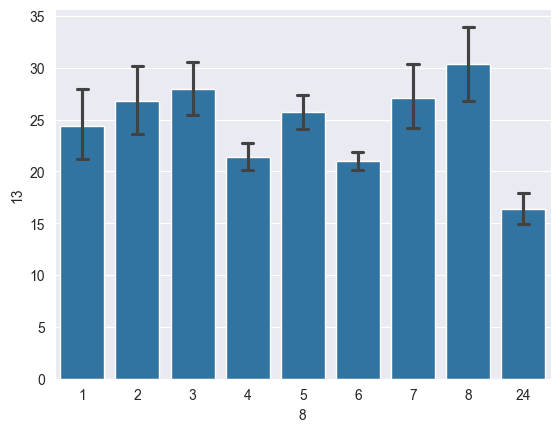

In [403]:
sns.barplot( x = 8, y = 13, data = df, capsize = .2)
plt.show()

In [404]:
#Изолирующий лес
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


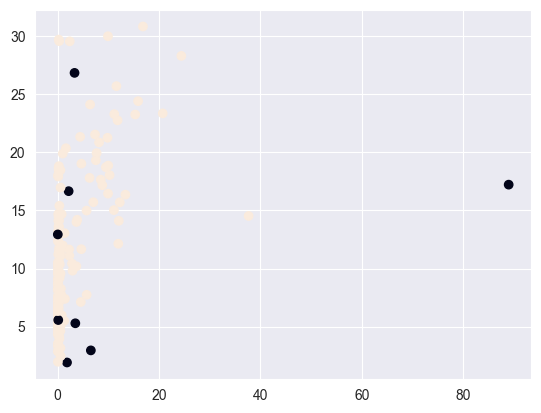

In [405]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination = 0.05)
iso = iso.fit(X_train)
yhat = iso.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 12], c = yhat)

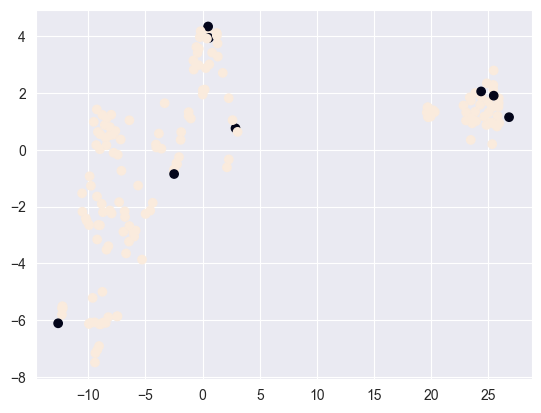

In [406]:
from sklearn.manifold import TSNE
Xn = TSNE(n_components = 2).fit_transform(X_test)
plt.scatter(Xn[:, 0], Xn[:, 1], c = yhat)

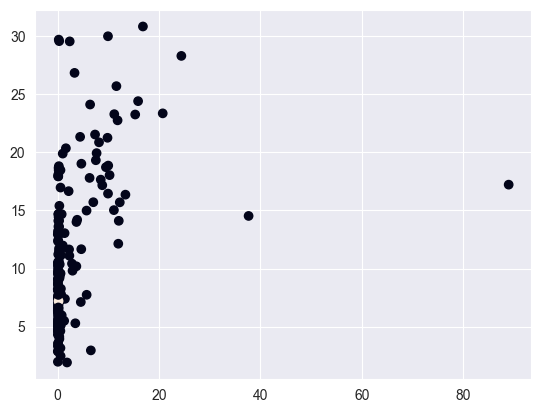

In [407]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
clf = OneClassSVM(gamma = 'auto', kernel = 'rbf', nu = 0.95).fit(X_train)
y_hat = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 12], c = y_hat)

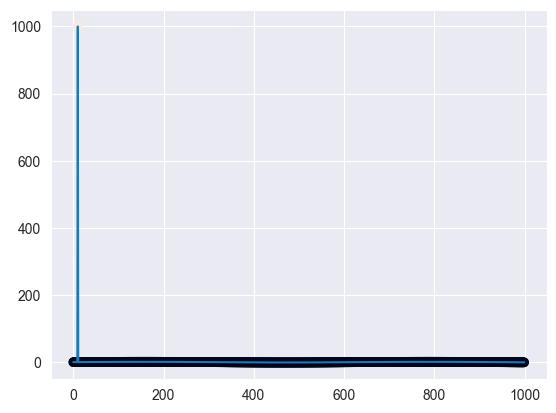

In [408]:
x = np.sin(np.linspace(0, 10, 1000))
x[10] = 1e3
plt.plot(x)

x_train = x.reshape(-1, 1)
clf = OneClassSVM(gamma='auto', kernel='linear', nu=0.999).fit(x_train)
y_hat = clf.predict(x_train)
plt.scatter(range(len(x)), x, c=y_hat)
plt.show()


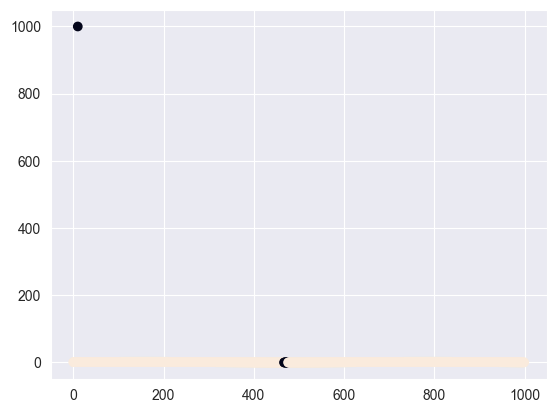

In [409]:
#Элиптические мтеоды
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination = 0.01)
yp = ee.fit_predict(x_train)
plt.scatter(range(x.shape[0]), x, c = yp)

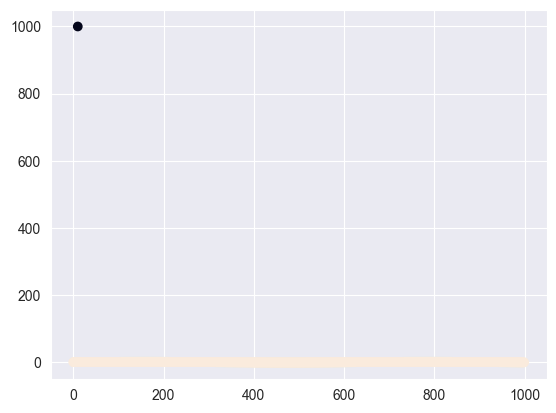

In [410]:
from sklearn.neighbors import LocalOutlierFactor
x_train = x.reshape(-1, 1)
lof = LocalOutlierFactor(novelty=False)
yhat = lof.fit_predict(x_train)
plt.scatter(range(len(x)), x, c=yhat)
plt.show()

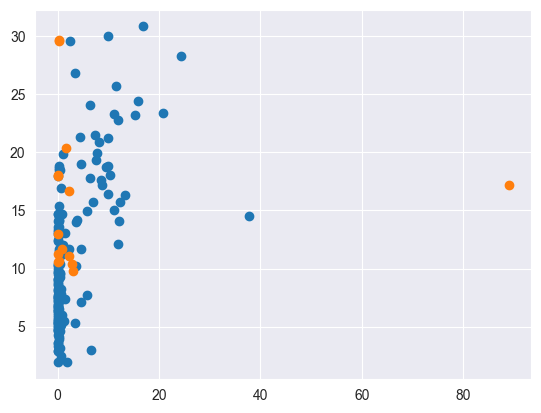

In [411]:
from sklearn.cluster import DBSCAN
for eps in np.linspace(0.1, 200, 100):
  ee = DBSCAN(eps = eps, min_samples = 2)
  yhat = ee.fit_predict(X_test)
  yhat = np.array(yhat)
  if yhat[yhat < 0].shape[0] < 0.1 * yhat.shape[0]:
    break
X_test = np.array(X_test)
plt.scatter(X_test[yhat >= 0, 0], X_test[yhat >= 0, 12])
plt.scatter(X_test[yhat < 0, 0], X_test[yhat < 0, 12])
plt.show()

In [412]:
x = np.random.rand(100, 1)
y=5.1*x[:,0]+3+np.random.rand(100)*0.5 
y[10]=10000

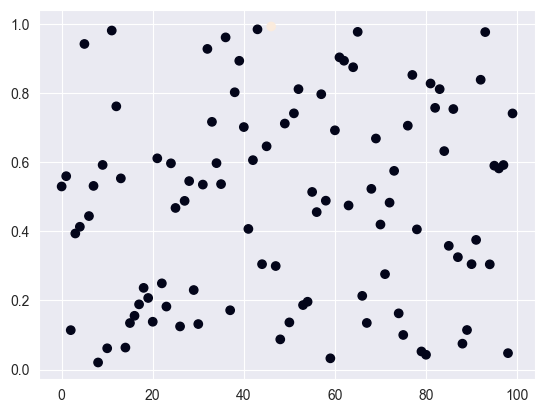

In [414]:
x_train = x.reshape(-1, 1)
clf = OneClassSVM(gamma='auto', kernel='linear', nu=0.999).fit(x_train)
y_hat = clf.predict(x_train)
plt.scatter(range(len(x)), x, c=y_hat)
plt.show()